# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some useful functions of the Scikit-Learn library

Overview:
    
 0. An end-to-end SciKit-Learn workflow
 1. Getting the data ready
 2. Choose the right estimator/algorithm for our problems
 3. Fit the model/algo and use it to make predictions for our data
 4. Evaluating a model
 5. Improve a model
 6. Save and load a trained model
 7. Putting it all together
    
    

## 0. An end-to-end Scikit-Learn workflow

In [19]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv("C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [21]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
clf.fit(x_train, y_train);

In [24]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [ ]:
# 4. Evaluate the model on the training data and test data

clf.score(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:2f}%")

In [ ]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test, y_test)

## 1. Getting data ready to be used with machine learning

Three main things to do:
    1. Split the data into features nad labels (usually 'x' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
x = heart_disease.drop("target", axis=1)
x.head()

In [ ]:
y = heart_disease["target"]
y.head()

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
x.shape[0] * 0.8

In [ ]:
242 + 61

In [ ]:
len(heart_disease)

## 1.1 Make sure it's all numerical

In [ ]:
 car_sales = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended.csv')

In [ ]:
car_sales.head()

In [ ]:
len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# Split into x/y
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(x)
transformed_x

In [ ]:
x.head()
pd.DataFrame(transformed_x)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit the model

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)

model.fit(x_train, y_train)

In [ ]:
model.score(x_test,y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [ ]:
 # Import car sales missing data
car_sales_missing = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended-missing-data.csv')

In [ ]:
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create x & y
x= car_sales_missing.drop("Price", axis = 1)
y= car_sales_missing["Price"]

# Let's try to convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(x)
transformed_x

### Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column

car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

In [ ]:
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [ ]:
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [ ]:
# Check our dataframe again
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
x = car_sales_missing.drop("Price", axis = 1)
y= car_sales_missing["Price"]

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

### Option 2: Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended-missing-data.csv')

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split into x & y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [ ]:
# Fill missing values with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' $ numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
    ])

# Transform the data

filled_x = imputer.fit_transform(x)
filled_x

In [ ]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

In [ ]:
car_sales_filled.isna().sum()

In [ ]:


# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size= 0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

## 2. Choosing the right estimator/algo for your problem

Some things to note:

* Sklearn refers to machine learning models and algorithms as estimators
* Classification problem = predicting a category (heart disease or not)
   * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
* Regression problem = predicting a number (Sales price of car)   

In [ ]:
### 2.1 Picking a machine learning model for a regression problem

# Let's use the California Housing dataset

In [ ]:
# Get California housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

In [ ]:
housing_df["target"] = housing["target"]
housing_df.head()

In [ ]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

In [ ]:
# Import algorithm

from sklearn.linear_model import Ridge


# Setup random seed
np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

In [ ]:
# What if 'Ridge' didn't work or the score didn't fit our needs?

# Try a different model


In [ ]:
# Ensemble model (combination of smaller models to enhance predictions)

In [ ]:
# Import the RandomForestRegressor model class from the ensemble model
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y= housing_df["target"]

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score of the model (on the test set)

model.score(x_test,y_test)

## 2.2 Picking a machine learning model for a classification problem


In [ ]:
heart_disease = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\heart-disease.csv')

In [ ]:
heart_disease.head()

In [ ]:
len(heart_disease)

In [ ]:
 # Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
 # Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(x_test,y_test)

In [ ]:
# If you have structured data, use ensemble methods
# If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algo on our data and use it to make predictions

### 3.1 Fitting the model to our data

In [ ]:
 # Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(x_test,y_test)

In [ ]:
x.head()

In [ ]:
y.head()

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # This doesn't work!! (example)

In [ ]:
x_test

In [ ]:
clf.predict(x_test)

In [ ]:
y_test

In [ ]:
np.array(y_test)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

## Make predictions with predict_proba()


In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

In [ ]:
# Let's predict() on the same data...
clf.predict(x_test[:5])

In [ ]:
heart_disease["target"].value_counts()

## predict() can also be used for regression models

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# fit the model to the data
model.fit(x_train,y_train)

# make predictions 
y_preds = model.predict(x_test)

In [ ]:
y_preds[:10]

In [ ]:
 np.array(y_test[:10])

In [ ]:
len(y_preds)

In [ ]:
len(y_test)

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

In [ ]:
housing_df["target"] 

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

    1. Estimator's built-in score() method
    2. The scoring parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_train,y_train)

In [ ]:
y_train

In [ ]:
clf.score(x_test,y_test)

In [ ]:
## Using the score() method on our regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis=1)
y= housing_df["target"]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model instance

model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data 
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
housing_df.head()

### 4.2 Evaluating a model using the 'scoring' parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
cross_val_score(clf,x,y)

In [ ]:
cross_val_score(clf,x,y,cv=5)

In [ ]:
cross_val_score(clf,x,y,cv=10)

In [ ]:
np.random.seed(42)

In [ ]:
# Single training and test split score
clf_single_score = clf.score(x_test,y_test)

# Take the mean of 5-fold cross val score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

# compare the two
clf_single_score, clf_cross_val_score

In [ ]:
# Default scoring parameter of classfier = mean accuracy


# Scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

** Area under the receiver operating characteristic curv (AUC/ROC) **

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs. a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# Create x_test ...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(x_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

In [ ]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) 
    and true positive rate (tpr) of a model.
    """
    
    # plot roc curve
    plt.plot(fpr,tpr,color="orange", label = "ROC")
    
    # Plot line with no predictive power
    
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive reate (tpr)")
    plt.title("Receiver operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)    
    

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

In [ ]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

# Perfect AUC score
roc_auc_score(y_test,y_test)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and 
the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [25]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[16,  8],
       [ 8, 29]], dtype=int64)

In [26]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,16,8
1,8,29


In [27]:
23 + 6 + 6 + 26

61

In [28]:
len(x_test)

61

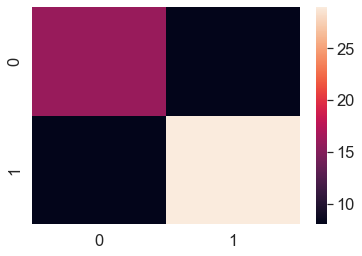

In [29]:


# Make our confusion matrix more visual with Seabor's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

In [36]:
import sklearn
sklearn.__version__

'1.0.2'

In [34]:
clf

RandomForestClassifier()

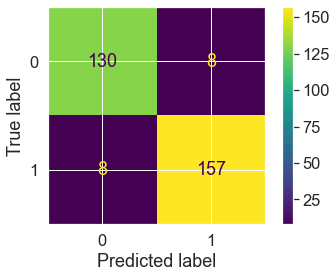

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf,x,y)

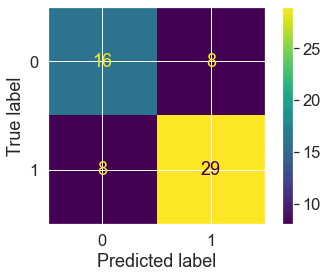

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)